In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from src.diffraction import *
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt

/Users/zoefaurebeaulieu/miniconda3/envs/steinhardt/lib/python3.10/site-packages/ovito/_extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


In [2]:
structs = []
structs.append(read('../data/mda/run1/final_mda.extxyz'))
# structs.append(read('../data/ice_Ih/ice_Ih_conf1.extxyz'))
structs.append(read('../data/training/lda/lda_conf0.extxyz'))
structs.append(read('../data/training/hda/hda_conf0.extxyz'))


In [3]:
# Define the Gaussian kernel
def gaussian_kernel(size, sigma=0.1):
    x = np.linspace(-size // 2, size // 2, size)
    kernel = np.exp(-x**2 / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Define the size and sigma of the Gaussian kernel
kernel_size = 1001  # Size of the kernel (should be an odd number)
sigma = 10 # Standard deviation of the Gaussian

# Generate the Gaussian kernel
kernel = gaussian_kernel(kernel_size, sigma)



Species  ('O-O',)
Species  ('O-O',)
Species  ('O-O',)


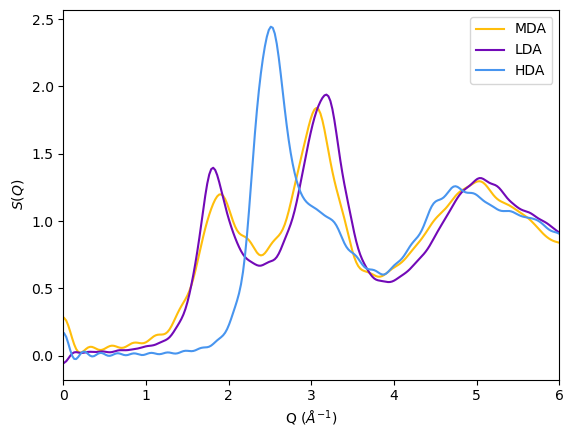

In [6]:
from src.diffraction import Sq
labels = ['MDA','LDA', 'HDA']
colors = ['#ffbe0b','#7209b7','#4895ef']


fig, ax = plt.subplots()
for i,s in enumerate(structs):
    max_cell = np.max(s.cell)
    cutoff = max_cell / 2
    struct_factor = Sq(s, cutoff,q=np.linspace(0.01, 12, 500))
    if labels[i] == 'Ice Ih':
        # Smooth the function using convolution
    
        smoothed = np.convolve(struct_factor['O-O'], kernel, mode='same')
        ax.plot(struct_factor['q'], smoothed, label=labels[i], color=colors[i])
    
    else:
        ax.plot(struct_factor['q'], struct_factor['O-O'], label=labels[i], color=colors[i])

ax.set_xlim(0,6)
ax.set(xlabel= 'Q ($Å^{-1}$)', ylabel='$S(Q)$');
ax.legend()

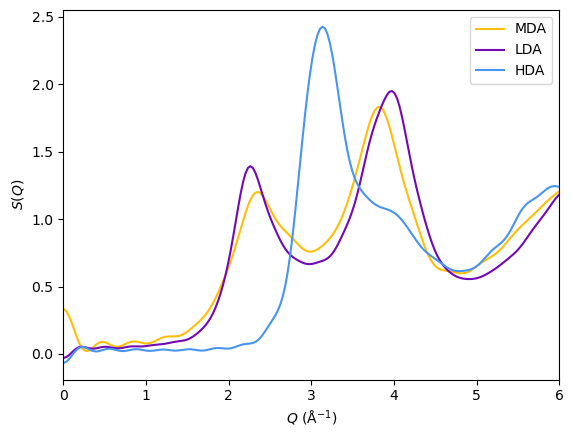

In [10]:
from ase.io import read
from src.scattering import *

# example usage with final_mda.extxyz
# atoms = read("data/ice_Ih/ice_Ih_conf1.extxyz", index=-1)
for i,atoms in enumerate(structs):
    sc = ScatteringCalculator(atoms)
    sc.compute_rdf()
    # sc.plot_rdf()
    sc.compute_sq(np.linspace(0.01, 12, 500))
    sc.plot_sq(label=labels[i], c=colors[i])